# ner gaph

In [ ]:
import re
import os
import jieba
import codecs
import random
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx

from pylab import mpl

from pyltp import  Postagger, Parser
from graphviz import Digraph
from kashgari.corpus import ChineseDailyNerCorpus

from utils import *

## helper functions

In [4]:
def word_tag(words, tags):
    """
    Process sentense transfer words and tags into word-level:
    
    Arguments:
        words - sentense string
        tags - BIEO tag of chinese character level
    """
    ad = np.array([len(w) for w in words])
    idl = [ind - 1 for ind in list(ad.cumsum())]
    w_tags = [re.findall('-(.*)',tags[i])[0] if re.findall('-(.*)',tags[i]) else '' for i in idl]

    return w_tags

def gviz_dsp(sent, tags):
    # jieba.add_word('Polar码')
    words = list(jieba.cut(sent))
    
    # 词性标注
    postagger = Postagger()
    pos_model_path = '/home/ubuntu/Studio/model_files/ltp/ltp_data_v3.4.0/pos.model'
    postagger.load(pos_model_path)

    par_model_path = '/home/ubuntu/Studio/model_files/ltp/ltp_data_v3.4.0/parser.model'
    parser = Parser()
    parser.load(par_model_path)
    postags = postagger.postag(words)
    
    # DSP analysis
    arcs = parser.parse(words, postags)

    # arcs structure:
#     [print(words[i], words[arc.head], arc.relation) for i, arc in enumerate(arcs)]
    # we tag id for each word annotation of origin sentence
    # index - after dsp, head - headsTo index , relation - relation type
    rely_id = [arc.head for arc in arcs]  # get parent id
    relation = [arc.relation for arc in arcs]  # get relationship type
    heads = ['Root' if id == 0 else words[id-1] for id in rely_id]  # 匹配依存父节点词语

    wtags = word_tag(words, tags)

    # gviz graph:
    g = Digraph('test')

    g.node(name='Root')
    for word, tag in zip(words,wtags):
        if tag != '':
            g.node(name=word, label = word + '-' + tag)
        else:
            g.node(name=word)

    for i in range(len(words)):
        if relation[i] not in ['HED']:
            g.edge(words[i], heads[i], label=relation[i])
        else:
            if heads[i] == 'Root':
                g.edge(words[i], 'Root', label=relation[i])
            else:
                g.edge(heads[i], 'Root', label=relation[i])

    return g, wtags

## demo of sent_to_graph

In [20]:
# train_x, train_y = ChineseDailyNerCorpus.load_data('train')
# valid_x, valid_y = ChineseDailyNerCorpus.load_data('validate')
# test_x, test_y  = ChineseDailyNerCorpus.load_data('test')

In [21]:
i = random.randint(0,len(train_x))
taglen = len(list(set(train_y[i])))
while taglen < 2:
    i = random.randint(0,len(train_x))
    taglen = len(list(set(train_y[i])))

sent = ''.join(train_x[i])
tags = train_y[i]

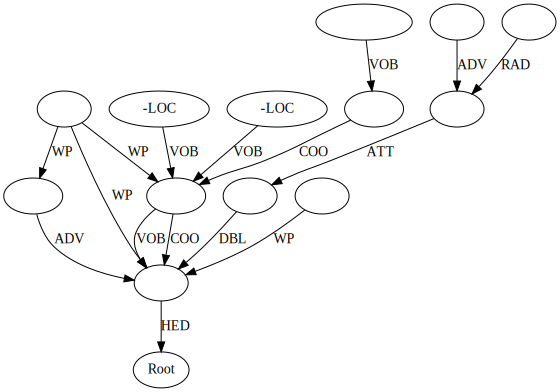

In [22]:
g, wtags = gviz_dsp(sent, tags);g

In [ ]:
# ner gaph

import re
import os
import jieba
import codecs
import random
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx

from pylab import mpl

from pyltp import  Postagger, Parser
from graphviz import Digraph
from kashgari.corpus import ChineseDailyNerCorpus

from utils import *

## helper functions

def word_tag(words, tags):
    """
    Process sentense transfer words and tags into word-level:
    
    Arguments:
        words - sentense string
        tags - BIEO tag of chinese character level
    """
    ad = np.array([len(w) for w in words])
    idl = [ind - 1 for ind in list(ad.cumsum())]
    w_tags = [re.findall('-(.*)',tags[i])[0] if re.findall('-(.*)',tags[i]) else '' for i in idl]

    return w_tags

def gviz_dsp(sent, tags):
    # jieba.add_word('Polar码')
    words = list(jieba.cut(sent))
    
    # 词性标注
    postagger = Postagger()
    pos_model_path = '/home/ubuntu/Studio/model_files/ltp/ltp_data_v3.4.0/pos.model'
    postagger.load(pos_model_path)

    par_model_path = '/home/ubuntu/Studio/model_files/ltp/ltp_data_v3.4.0/parser.model'
    parser = Parser()
    parser.load(par_model_path)
    postags = postagger.postag(words)
    
    # DSP analysis
    arcs = parser.parse(words, postags)

    # arcs structure:
#     [print(words[i], words[arc.head], arc.relation) for i, arc in enumerate(arcs)]
    # we tag id for each word annotation of origin sentence
    # index - after dsp, head - headsTo index , relation - relation type
    rely_id = [arc.head for arc in arcs]  # get parent id
    relation = [arc.relation for arc in arcs]  # get relationship type
    heads = ['Root' if id == 0 else words[id-1] for id in rely_id]  # 匹配依存父节点词语

    wtags = word_tag(words, tags)

    # gviz graph:
    g = Digraph('test')

    g.node(name='Root')
    for word, tag in zip(words,wtags):
        if tag != '':
            g.node(name=word, label = word + '-' + tag)
        else:
            g.node(name=word)

    for i in range(len(words)):
        if relation[i] not in ['HED']:
            g.edge(words[i], heads[i], label=relation[i])
        else:
            if heads[i] == 'Root':
                g.edge(words[i], 'Root', label=relation[i])
            else:
                g.edge(heads[i], 'Root', label=relation[i])

    return g, wtags

## demo of sent_to_graph

# train_x, train_y = ChineseDailyNerCorpus.load_data('train')
# valid_x, valid_y = ChineseDailyNerCorpus.load_data('validate')
# test_x, test_y  = ChineseDailyNerCorpus.load_data('test')

i = random.randint(0,len(train_x))
taglen = len(list(set(train_y[i])))
while taglen < 2:
    i = random.randint(0,len(train_x))
    taglen = len(list(set(train_y[i])))

sent = ''.join(train_x[i])
tags = train_y[i]

g, wtags = gviz_dsp(sent, tags);g